We experimented with various methods, including DNNs, RNNs, LSTMs, and different architectures. The comment 

"Selected" in the code cells indicates that both the selected architectures and predictions are the ones 

highlighted in the paper.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np
import keras
from sklearn.manifold import TSNE
# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [3]:
df = pd.read_csv('balanced_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
0,523144,3.103243,0.0,0.0,3.0,180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1082693,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,856694,-1.000000,-1.0,-1.0,6.0,360.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,145533,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,927896,-1.000000,-1.0,-1.0,2.0,120.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
del df['Unnamed: 0']

In [6]:
df.head()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
0,3.103243,0.0,0.0,3.0,180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.000000,-1.0,-1.0,6.0,360.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.000000,-1.0,-1.0,2.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.000000,-1.0,-1.0,2.0,120.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df['label'].value_counts()

0.0    961750
1.0    934971
Name: label, dtype: int64

In [8]:
df.shape

(1896721, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896721 entries, 0 to 1896720
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   duration        float64
 1   orig_bytes      float64
 2   resp_bytes      float64
 3   orig_pkts       float64
 4   orig_ip_bytes   float64
 5   resp_pkts       float64
 6   resp_ip_bytes   float64
 7   label           float64
 8   proto_icmp      float64
 9   proto_tcp       float64
 10  proto_udp       float64
 11  conn_state_OTH  float64
 12  conn_state_REJ  float64
 13  conn_state_S0   float64
 14  conn_state_S1   float64
dtypes: float64(15)
memory usage: 217.1 MB


In [10]:
df.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06,1.896721e+06
mean,9.939172e-01,2.259415e+03,1.204505e+03,9.447143e+01,4.002427e+04,1.379072e-01,6.307683e+00,4.929407e-01,9.450286e-03,8.531721e-01,1.373458e-01,5.463121e-02,4.757778e-03,9.055445e-01,9.985138e-05
std,1.170665e+02,1.498276e+06,8.714049e+03,6.186901e+04,2.462160e+06,1.041766e+01,9.106090e+03,4.999503e-01,9.717652e-02,3.551985e-01,3.454452e-01,2.274508e-01,6.911150e-02,2.930604e-01,1.004894e-02
min,-3.838919e+01,-3.375736e+04,-5.478376e+03,-1.773872e+04,-2.536385e+04,-9.626610e+00,-1.542204e+04,0.000000e+00,-6.330904e-02,-1.872771e-01,-2.088951e-01,-6.682470e-02,-4.703961e-02,-1.259615e-01,-6.198886e-03
25%,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.811442e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.927470e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.663869e+00,0.000000e+00,2.077302e+03,3.000000e+00,5.474316e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.587415e-02,1.217598e-03,0.000000e+00,1.000000e+00,0.000000e+00
max,4.897682e+04,1.744830e+09,1.166102e+07,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,1.000000e+00,1.056745e+00,1.212814e+00,1.209808e+00,1.050136e+00,1.037400e+00,1.136759e+00,1.003876e+00


In [11]:
df.std()

duration          1.170665e+02
orig_bytes        1.498276e+06
resp_bytes        8.714049e+03
orig_pkts         6.186901e+04
orig_ip_bytes     2.462160e+06
resp_pkts         1.041766e+01
resp_ip_bytes     9.106090e+03
label             4.999503e-01
proto_icmp        9.717652e-02
proto_tcp         3.551985e-01
proto_udp         3.454452e-01
conn_state_OTH    2.274508e-01
conn_state_REJ    6.911150e-02
conn_state_S0     2.930604e-01
conn_state_S1     1.004894e-02
dtype: float64

In [12]:
df.shape

(1896721, 15)

In [13]:
df_train,df_test=train_test_split(df, test_size=0.25, random_state=42)

In [14]:
df_train.shape

(1422540, 15)

In [15]:
df_test.shape

(474181, 15)

In [16]:
x = df_train.drop(["label"], axis=1)
y = df_train["label"].values

In [17]:
x.shape

(1422540, 14)

# For Evaluation

In [18]:
x_vld= df_test.drop(["label"], axis=1)
y_vld = df_test["label"].values

In [19]:
#train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

In [20]:
#train_x.shape

# DNN

In [42]:
#Selected
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x.shape[1],)))

model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(x, y,batch_size=100,epochs=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1500      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 40)                2040      
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 10,271
Trainable params: 10,271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
14226/14226 [===========================

14819/14819 [==============================] - 9s 587us/step
Overall Accuracy: 94.41%
--------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    240571
         1.0       0.90      1.00      0.95    233610

    accuracy                           0.94    474181
   macro avg       0.95      0.94      0.94    474181
weighted avg       0.95      0.94      0.94    474181



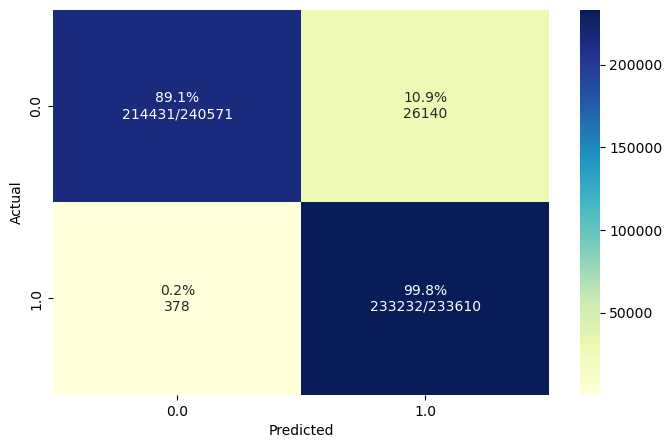

In [45]:
#Selected
y_pred_NN=(model.predict(x_vld)> 0.5)
report_heatmap(y_pred_NN,y_vld)

# LSTM

In [21]:
#Selected
L_S_T_M2 = keras.models.Sequential([
keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
keras.layers.LSTM(10, return_sequences=True),
keras.layers.LSTM(5),
keras.layers.Dense(1,activation='sigmoid')
])

L_S_T_M2.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
L_S_T_M2.summary()
L_S_T_M2.fit(x, y,batch_size=100,epochs=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, None, 10)          1240      
                                                                 
 lstm_2 (LSTM)               (None, 5)                 320       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 3,326
Trainable params: 3,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
14226/14226 [==============================] - 543s 37ms/step - loss: 0.1693 - accuracy: 0.9261
Epoch 2/2
14226/14226 [==============================] - 523s 37ms/step - loss: 

14819/14819 [==============================] - 72s 5ms/step
Overall Accuracy: 96.10%
--------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    240571
         1.0       0.93      0.99      0.96    233610

    accuracy                           0.96    474181
   macro avg       0.96      0.96      0.96    474181
weighted avg       0.96      0.96      0.96    474181



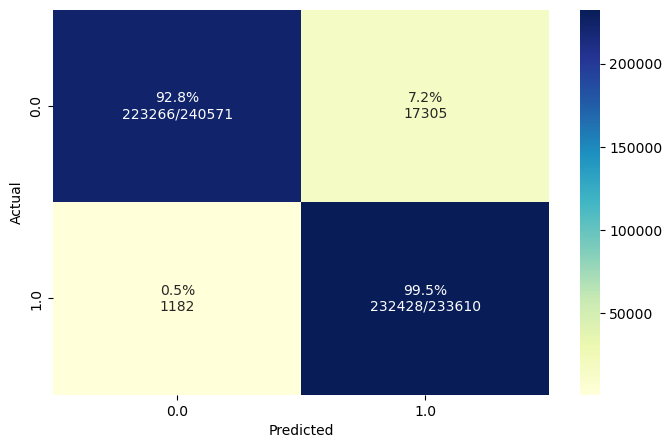

In [22]:
#Selected
y_pred_L_S_T_M2=(L_S_T_M2.predict(x_vld)> 0.5)
report_heatmap(y_pred_L_S_T_M2,y_vld)

# GRU

In [48]:
#Selected
gru = keras.models.Sequential([
keras.layers.Conv1D(filters=5, kernel_size=2, strides=2, padding="valid",input_shape=[None, 1]),
keras.layers.GRU(5,return_sequences=True),
keras.layers.GRU(3),
keras.layers.Dense(1,activation='sigmoid')
])

gru.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
gru.summary()
gru.fit(x, y,batch_size=100,epochs=3)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, None, 5)           15        
                                                                 
 gru_31 (GRU)                (None, None, 5)           180       
                                                                 
 gru_32 (GRU)                (None, 3)                 90        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
14226/14226 [==============================] - 65s 4ms/step - loss: 0.1469 - accuracy: 0.9422
Epoch 2/3
14226/14226 [==============================] - 70s 5ms/step - loss: 0.112

14819/14819 [==============================] - 19s 1ms/step
Overall Accuracy: 96.23%
--------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    240571
         1.0       0.93      1.00      0.96    233610

    accuracy                           0.96    474181
   macro avg       0.96      0.96      0.96    474181
weighted avg       0.96      0.96      0.96    474181



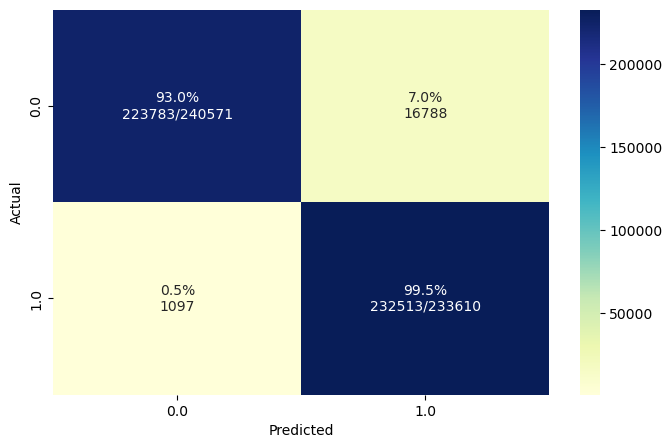

In [49]:
#Selected
y_pred_gru=(gru.predict(x_vld)> 0.5)
report_heatmap(y_pred_gru,y_vld)

In [ ]:
#END